### Задание простое -- сделать любой отчет по данным, приходящим из Flume :)
### • Можно воспользоваться ноутбуком Jupyter по адресу http://89.208.222.53:8000/

In [44]:
!python3 -m pip install happybase

In [45]:
import happybase
import re
import matplotlib.pyplot as plt
%matplotlib inline

#### Установим соединение с Hbase

In [149]:
connection = happybase.Connection(host='89.208.221.132', port=9090, autoconnect=True)

In [150]:
table = connection.table('Student5_4')

#### Создадим список из времени поступления записей

In [102]:
time_list = []
for row in table.scan():
    try: time_list.append(list(row[1].values())[0].split()[2])
    except IndexError: print("Last message")  

Last message


In [158]:
print(time_list)

[b'02:01:01', b'09:37:03', b'23:01:01', b'09:01:01', b'03:01:01', b'10:01:01', b'14:01:01', b'06:01:01', b'17:01:01', b'02:01:01', b'10:01:01', b'04:01:01', b'18:01:02', b'01:01:01', b'20:01:01', b'23:01:01', b'21:01:01', b'03:01:01', b'19:01:01', b'01:01:01', b'09:37:03', b'19:01:01', b'20:01:01', b'17:01:01', b'23:01:01', b'16:01:01', b'16:01:01', b'01:01:01', b'12:01:01', b'16:35:03', b'08:01:01', b'11:01:01', b'07:01:01', b'04:01:01', b'17:01:42', b'15:01:01', b'15:01:01', b'20:01:01', b'15:01:02', b'22:01:01', b'11:01:01', b'04:01:01', b'07:01:01', b'12:01:01', b'06:01:01', b'11:01:01', b'12:01:01', b'18:01:02', b'16:35:03', b'16:35:03', b'00:01:01', b'05:01:01', b'11:01:01', b'00:01:01', b'09:01:01', b'12:01:01', b'18:01:01', b'21:01:01', b'06:01:01', b'00:01:01', b'14:01:01', b'04:01:01', b'16:01:01', b'08:01:01', b'14:01:01', b'07:01:01', b'22:47:11', b'05:01:01', b'22:01:01', b'00:01:01', b'03:01:01', b'05:01:01', b'18:01:01', b'05:01:01', b'13:01:01', b'20:01:01', b'01:01:01'

In [117]:
from matplotlib import dates
import datetime as dt

In [111]:
time_interval = [dt.datetime.strptime(i.decode("utf-8"), "%H:%M:%S") for i in time_list]

#### Изобразим график распределения сообщений по времени поступления

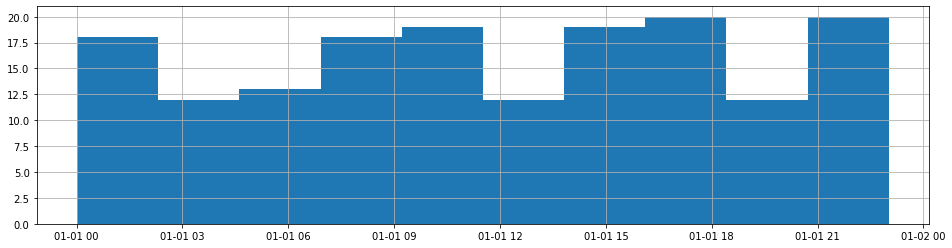

In [145]:
from pylab import rcParams
plt.hist(time_interval)
rcParams["figure.figsize"] = 16, 4
plt.grid()
plt.show()